<a href="https://colab.research.google.com/github/mz-zarei/SequentialModels_projects/blob/main/TimeSeriesPandas/TimeSeriesAnalysisWithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Outcomes

* Understand time series applications for NumPy and Pandas
* Summarize a dataframe with a datetime index
* Generate simple time series plots


# Overview: Time Series Data in Python

In this lesson, we will explore some key Time Series-related functionality in the Numpy, Pandas, and Matplotlib packages. We will explore basic data types and summarize a Pandas DataFrame with a DateTime index. We will also explore basic plotting and Time Series visualization. For this lesson, we will use a sample dataset called "Superstore Sales", which includes 4 years of daily Sales data by customer and category. Note: this lesson assumes some basic familiarity with Python and Python data types. References are provided for introductory lessons for each module.

__[Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html):__ has built-in Time Series functionality to work with dates, date ranges, and Time Series data. It is useful for analyzing groups of time series and manipulating data. 

# Key Data Types for Time Series Data

## Key NumPy data types:
> 1. __[`Array`](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)__: Array of similarly-typed values, fundamental building block of further analysis. The NumPy __Array__ object has several useful built-in [methods](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods), including: `shape`, `max`/`min`, `argmax`/`argmin`, `sum`, `cumsum`, `mean`, `var`, `std`, `prod`, `cumprod`, etc.
> 2. __[`datetime64`](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)__: is NumPy's datetime format, where each value is a timestamp. It was created to improve on Python's datetime format, and stores timestamps as 64-bit integers. These timestamps often default to nanosecond precision (`datetime64[ns]`), even when working with daily or hourly data, although this can be adjusted.   
> 3. __[`timedelta64`](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)__: is NumPy's time interval format, which can be thought of as a period of time between two *datetime64* values and uses the same units as *datetime64*. The most common unit values are: __Y__: `year`, __M__: `month`, __W__: `week`, __D__: `day`, __h__: `hour`, __m__: `minute`, __s__: `second`, __ns__: `nanosecond` (default). 

## Key Pandas data types:
> 1. __[`Series`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series)__: Series is a one-dimensional labeled array that is capable of holding any data type (i.e. `int`, `str`, `float`, etc.), but every element is of this same type. The axis labels of a Series are referred to as the __Index__ of the Series, while the Pandas __Series__ object is similar to the NumPy __Array__, 
> 2. __[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)__: Dataframe is a two-dimensional labeled data structure with columns of potentially different types. It largely resembles a spreadsheet or SQL table. The first axis labels of a Dataframe (rows) are referred to as the __Index__ of the Series, whereas the second axis labels labels of a Dataframe (columns) are referred to as the __Columns__ of the Series
> 3. __[`Index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)__: Pandas provides much of its functionality through the __Index__ object. Every DataFrame has an attribute: `.index`, which uniquely labels rows and columns and facilitates DataFrame manipulation. The simplest (default) Index type is a RangeIndex, usually a list of integer values. This is often automatically generated when an Index is not set explicitly, or when the Index is reset. Time Series data are usually best represented using the __[DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex)__ Index, which is an index of NumPy datetime64 values. However, it is sometimes convenient to use time intervals for the index using the __[Timedelta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta)__ index, or the __[PeriodIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.PeriodIndex.html#pandas.PeriodIndex)__ when intervals are regular. Pandas supports multiple-level indexing (including hierarchical indexing) via the __[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html#pandas.MultiIndex)__, which accommodates indices of different types and can simplify data exploration.

# Dataset Exploration Example
Here we will read in some sample data and explore some key data types and attributes. Our source data is a publicly-available retail sales dataset: __[Superstore Sales]("data/Superstore - Sales.csv")__, available as a spreadsheet. We begin by importing the libraries and reading in data.

## Setup

In [1]:
# imports
# !pip install --upgrade xlrd

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
# os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

### Read in source data:
It is often easiest to read data in as a Pandas DataFrame. Pandas provides a variety of __[Input/Output](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)__ options to read files from common (.csv, .json) or proprietary (.xls, .sas7bdat) formats.

In [10]:
df = pd.read_excel("Sample - Superstore.xls")
df.columns
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


We can see the data have been input and the columns are referenced by a Pandas Index object. There are two Date variables (Order Date and Ship Date), variables for customer and region, product type variables (Category, Sub-Category, Product Name), etc. 

### Simplify Time Series Data
We will start by simplifying the input data a bit to explore data types. To do so, we will look at Total Sales by Order Date and Category. This allows us to look a Time Series dataset with multiple time series. 

In [14]:
variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
outcome_variable = variables[2]
base = df.groupby(group_variables)[outcome_variable].sum().reset_index()
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


Note we reset the index, if we don't, Pandas sets the group variables to the index (more on this later). We can see the result is a Pandas DataFrame with columns for `Order Date`, `Category`, and `Sales`. We can think of this as a `Sales` time series for each `Category`.

In [4]:
print("Columns:", base.columns)
print("Index:", base.index)

Columns: Index(['Order Date', 'Category', 'Sales'], dtype='object')
Index: RangeIndex(start=0, stop=2864, step=1)


In [5]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


Individual DataFrame columns are Pandas `Series`, and we can see the `RangeIndex` on the left. This Pandas `DataFrame` is a combination of the `RangeIndex` and Pandas `Series` objects, where each has an underlying data type:

In [6]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

#### Pandas DataFrame types:

In [15]:
for x in base.columns:
    print(x, type(base[x]), base[x].dtype)

Order Date <class 'pandas.core.series.Series'> datetime64[ns]
Category <class 'pandas.core.series.Series'> object
Sales <class 'pandas.core.series.Series'> float64


### Working with NumPy Arrays
It isn't always necessary to extract NumPy arrays, as the Pandas Series contains NumPy functionality. However, some applications use NumPy arrays as inputs and can bypass Pandas if desired.

In [16]:
order_date = np.array(base['Order Date'])
category = np.array(base['Category'])
sales = np.array (base['Sales'])

In [17]:
print('Order Date', type(order_date), order_date.dtype)
print('Category', type(category), category.dtype)
print('Sales', type(sales), sales.dtype)

Order Date <class 'numpy.ndarray'> datetime64[ns]
Category <class 'numpy.ndarray'> object
Sales <class 'numpy.ndarray'> float64


If starting from the NumPy arrays, we could build the DataFrame (note dictionary input structure):

In [18]:
df_from_numpy = pd.DataFrame({'Order Date':order_date, 'Category':category, 'Sales':sales})

In [19]:
df_from_numpy.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

### datetime64 format in Numpy
The NumPy date array is a datetime64 object, with ns (nanosecond) units. We can leave it this way, or specify a unit:

While the Array and Pandas Series are basically the same, we see the Series has an index, and formats the date output somewhat.

In [20]:
order_date

array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
order_date_daily = np.array(order_date, dtype='datetime64[D]')

In [22]:
order_date_daily

array(['2011-01-04', '2011-01-05', '2011-01-06', ..., '2014-12-31',
       '2014-12-31', '2014-12-31'], dtype='datetime64[D]')

The order_date variable now has daily format, although this doesn't change much because we already had one observation per day. In practice, leaving nanosecond precision is usually fine. 

However, if we aggregate to monthly:

In [23]:
order_date_monthly = np.array(order_date, dtype='datetime64[M]')

In [24]:
order_date_monthly

array(['2011-01', '2011-01', '2011-01', ..., '2014-12', '2014-12',
       '2014-12'], dtype='datetime64[M]')

In [25]:
np.unique(order_date_monthly)

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [26]:
len(np.unique(order_date_monthly))

48

We can see we have 48 unique months of data. 

# Working with the Pandas DatetimeIndex 
Let's return to our Pandas DataFrame object:

In [28]:
display(base.head())
print('\n Unique categories:')
print(base['Category'].unique())

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3



 Unique categories:
['Office Supplies' 'Furniture' 'Technology']


## Setting Index Using Existing Variable
We often want to set an Index explicitly, or manipulate an Index, for working with Time Series data. The Pandas DateTime Index is useful here, although it is often useful to standardize the  index by ensuring all relevant time periods are included only once. Our data violate this condition for two reasons: (1) Multiple values for a given period (due to multiple categories) and (2) Missing days (for daily data). We will fix both of these issues below, and explore some useful Datetime functionality.

In [30]:
base.set_index('Order Date', inplace=True)
# Note that without inplace=True, it will output the results without changing the data

In [31]:
base.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [36]:
# print(base.index)
print(base.index.unique())

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)


## Subsetting data
We now have a __DatetimeIndex__ and we can use it to select data subsets:

In [33]:
# Observations in 2014
display(base['2011'].head())
print('\n')
# Observations in a range of dates, subset of columns:
display(base[base['Category'] == 'Office Supplies']['2011':'2012-02'].head())

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Office Supplies,685.3
2011-01-08,Office Supplies,10.4


## Datetime Components 
Pandas Datetime variables have a number of useful __[components](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)__.  Using the DatetimeIndex, we can extract items like month, year, day of week, quarter, etc.:

In [35]:
#base.set_index('Order Date', inplace=True)
print('Day:', base.index.day, '\n')
print('Week:', base.index.week, '\n')
base['DayofWeek'] = base.index.dayofweek # Day of Week: Monday=0, Sunday=6
display(base.head())
# Note: use dt method when the date variable is not part of the index: 
# df['Order Date'].dt.dayofweek.head()
del(base['DayofWeek'])

Day: Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864) 

Week: Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            52,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Order Date', length=2864) 



,Category,Sales,DayofWeek
Order Date,,,
2011-01-04,Office Supplies,16.4,1
2011-01-05,Office Supplies,288.1,2
2011-01-06,Office Supplies,19.5,3
2011-01-07,Furniture,"2,573.8",4
2011-01-07,Office Supplies,685.3,4


# Standardizing the DatetimeIndex 
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible [frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:
- No duplicate index values 
- No missing index values 

Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling. 



## Pivoting Data:

Because there are multiple categories, we have multiple Time Series to analyze. As a result, our __DatetimeIndex__ does not uniquely identify an observation. To uniquely identify observations, we can either add categorical variables to the Index, or set a Pandas DateTimeIndex with separate columns for each series. There are several ways to accomplish this. The first appraoch uses Pandas' built-in __[pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)__ method:

### Pandas pivot method


In [37]:
base.reset_index(inplace=True)
# Note if we didn't reset the index, we could use index=None below
sales_pivot = base.pivot(index='Order Date', columns='Category', values='Sales')
sales_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,NaN,16.4,NaN
2011-01-05,NaN,288.1,NaN
2011-01-06,NaN,19.5,NaN
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,NaN


Note that missing values (`NaN`) are often introduced here, and can be set to 0 easily using the `fillna(0)` method. 

### Unstacking:
To achieve the same result in Pandas, it is often easier to use the __Index__ and __[unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)__ / __[(stack)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)__ methods. The __unstack__ method transforms long data into wide data by creating columns by category for levels of the index, while __stack__ does the reverse.

Here, we can tell Pandas that the `Date` and `Category` values are part of the __Index__ and use the `unstack` function to generate separate columns (this also removes the `Category` column from the Index):

In [39]:
sales = base.set_index(['Order Date', 'Category']).unstack('Category').fillna(0)

# Note -- 2 levels of column names, the original variables are in columns.levels[0], 
# newly-created category variable names are in columns.levels[1]. This can be reset completely:
# sales.columns = sales.columns.levels[1].rename(None)
# Alternatively, keeping 'Sales' as a level 0 name allows us to refer to the variables jointly (sales['Sales'])
print(sales.columns)
print(sales.columns.levels[1])
sales.columns = sales.columns.levels[1].rename(None)
sales.head()

MultiIndex([('Sales',       'Furniture'),
            ('Sales', 'Office Supplies'),
            ('Sales',      'Technology')],
           names=[None, 'Category'])
Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object', name='Category')


,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0


In [40]:
print(sales.index)
print('\nUnique dates in our data: ', len(sales.index.unique()), 'Days')

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)

Unique dates in our data:  1238 Days


Since we have now created a column for each category, we can see there no longer repeated values in the Datetime Index. 

## Generating a complete Index and Setting Frequency
Since we are using daily data, we would like to set a daily frequency. We see our data has a length of 1238 days. By subtracting the smallest date from the largest date, we can tell there are some days missing:

In [41]:
print('\nUnique dates in our data: ', len(sales.index.unique()), 'Days')
our_date_range = sales.index.max() - sales.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')
#date_range = pd.date_range(min(sales.index), max(sales.index))


Unique dates in our data:  1238 Days
Total days in our date range: 1457 Days


We can generate a complete index using Pandas' __[date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)__ function:

In [42]:
new_index = pd.date_range(sales.index.min(), sales.index.max())
print(new_index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')


To use this index, we need to tell Pandas how to treat missing values. In this case, we want to use zero for days without sales data. 

In [43]:
sales_new = sales.reindex(new_index, fill_value=0)

In [44]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

We can see the result now has a daily frequency. While some Time Seriods models will work without an explicit frequency, many will not. It is also helps to ensure we aren't missing important dates when summarizing and plotting the data. 


## Resampling 
We can now easily Resample our data at any desired frequency, using either the `asfreq` method or the `resample` method. The `asfreq` method assumes a default fill approach (which can be dangerous). The `resample` method allows this to be specified directly. which generates a __[resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)__ object. To get to values, we need to specify an aggregation function if upsampling (moving to a lower frequency), or fill function if downsampling (moving to a higher frequency). This typically the sum or mean for upsampling, or interpolate for downsampling. We generate results for some common frequencies below:
### Upsampling (Moving to a longer period)

In [46]:
sales_weekly = sales_new.resample('W').sum()
print('Weekly Sales')
print(sales_weekly.head(), '\n')

sales_monthly = sales_new.resample('M').sum()
print('Monthly Sales')
print(sales_monthly.head(), '\n')

sales_quarterly = sales_new.resample('Q').sum()
print('Quarterly Sales')
print(sales_quarterly.head(), '\n')

sales_annual = sales_new.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Weekly Sales
            Furniture  Office Supplies  Technology
2011-01-09    2,650.5          1,019.8     1,147.9
2011-01-16    1,003.8          2,039.4       827.9
2011-01-23    1,747.3            871.1       824.1
2011-01-30      550.2            680.3       343.3
2011-02-06      290.7            502.7       649.9 

Monthly Sales
            Furniture  Office Supplies  Technology
2011-01-31    5,951.9          4,851.1     3,143.3
2011-02-28    2,130.3          1,071.7     1,608.5
2011-03-31   14,574.0          8,605.9    32,511.2
2011-04-30    7,944.8         11,155.1     9,195.4
2011-05-31    6,912.8          7,135.6     9,599.9 

Quarterly Sales
            Furniture  Office Supplies  Technology
2011-03-31   22,656.1         14,528.7    37,263.0
2011-06-30   28,063.7         31,243.7    27,231.3
2011-09-30   41,957.9         53,924.0    47,751.4
2011-12-31   64,515.1         52,080.0    63,032.6
2012-03-31   27,374.1         23,059.4    18,418.2 

Annual Sales
            Furnitur

### Downsampling (moving to a shorter period)
Just as upsampling (moving to a larger period) requires an aggregation function, downsampling (moving from Annual to Monthly, for example) requires an option to fill in missing values. A common approach is the __[interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.interpolate.html)__ method, which allows various types of interpolation (linear, spline, etc.). Other options (ffill forward fill, bfill backward fill) are also supported.

In [51]:
sales_annual.resample('M').sum().head(13)

,Furniture,Office Supplies,Technology
2011-12-31,"157,192.9","151,776.4","175,278.2"
2012-01-31,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0
2012-03-31,0.0,0.0,0.0
2012-04-30,0.0,0.0,0.0
2012-05-31,0.0,0.0,0.0
2012-06-30,0.0,0.0,0.0
2012-07-31,0.0,0.0,0.0
2012-08-31,0.0,0.0,0.0
2012-09-30,0.0,0.0,0.0


In [52]:
# Note that downsampling (from Annual to Monthly for example) produces missing values:
sales_monthly_from_annual = sales_annual.resample('M')
#print('Monthly from Annual Sales')
#sales_monthly_from_annual.interpolate(method='linear').head()
display(sales_monthly_from_annual.interpolate(method='spline', order=3).head(13))

,Furniture,Office Supplies,Technology
2011-12-31,"157,192.9","151,776.4","175,278.2"
2012-01-31,"157,062.6","147,084.7","168,957.8"
2012-02-29,"157,200.9","143,355.5","164,096.2"
2012-03-31,"157,611.1","140,049.0","159,969.0"
2012-04-30,"158,251.0","137,493.3","156,975.1"
2012-05-31,"159,147.3","135,491.9","154,859.3"
2012-06-30,"160,226.7","134,148.7","153,705.2"
2012-07-31,"161,545.1","133,348.1","153,380.6"
2012-08-31,"163,053.5","133,117.8","153,881.7"
2012-09-30,"164,678.7","133,412.6","155,099.4"


#### Resampling by changing frequency directly
Another way to achieve this is to use the `asfreq` method:

In [ ]:
sales_daily = sales.asfreq('D')
sales_businessday = sales.asfreq('B')
sales_hourly = sales.asfreq('h')
# This will generate missing values:
sales_hourly.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04 00:00:00,0.0,16.4,0.0
2011-01-04 01:00:00,nan,nan,nan
2011-01-04 02:00:00,nan,nan,nan
2011-01-04 03:00:00,nan,nan,nan
2011-01-04 04:00:00,nan,nan,nan


## Variable Transformations
For Time Series models, we may want to use transformed variables (log, difference, growth rate, etc). The example below illustrates how we might generate these variables in Pandas, using the Monthly Sales dataset. 

### Stationarity Transformations
Concerns about Stationarity often lead to considering variable transformations. Some commonly-used transformation methods (Variable Differencing, Percentage Change, and Log) are implemented below. Because of Index has several levels here, these transformations can be done for each outcome variable with one line (the results could be joined together using the Pandas __[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)__ method). 

In [ ]:
# Variable First Difference
print('Monthly Sales, First Difference \n', sales_monthly.diff().head())

# Variable Percent Change
print('\nMonthly Sales % Change \n', sales_monthly.pct_change().head())

# Log Sales
print('\nlog(1+Monthly Sales) \n', np.log(1 +  sales_monthly).head())

# Add % change to original data:
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_Change')).head()

Monthly Sales, First Difference 
             Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28   -3,821.5         -3,779.4    -1,534.8
2011-03-31   12,443.6          7,534.2    30,902.7
2011-04-30   -6,629.1          2,549.2   -23,315.7
2011-05-31   -1,032.1         -4,019.4       404.4

Monthly Sales % Change 
             Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28       -0.6             -0.8        -0.5
2011-03-31        5.8              7.0        19.2
2011-04-30       -0.5              0.3        -0.7
2011-05-31       -0.1             -0.4         0.0

log(1+Monthly Sales) 
             Furniture  Office Supplies  Technology
2011-01-31        8.7              8.5         8.1
2011-02-28        7.7              7.0         7.4
2011-03-31        9.6              9.1        10.4
2011-04-30        9.0              9.3         9.1
2011-05-31        8.8              8.9         9.

,Furniture,Office Supplies,Technology,Furniture_%_Change,Office Supplies_%_Change,Technology_%_Change
2011-01-31,"5,951.9","4,851.1","3,143.3",nan,nan,nan
2011-02-28,"2,130.3","1,071.7","1,608.5",-0.6,-0.8,-0.5
2011-03-31,"14,574.0","8,605.9","32,511.2",5.8,7.0,19.2
2011-04-30,"7,944.8","11,155.1","9,195.4",-0.5,0.3,-0.7
2011-05-31,"6,912.8","7,135.6","9,599.9",-0.1,-0.4,0.0


### Rolling Averages and Windows
Another approach to transforming data involves looking at rolling averages. We will discuss this further in the Smoothing lessons. Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

In [53]:
window_size = 7
rolling_window = sales_new.rolling(window_size)
print('Rolling Mean')
print(rolling_window.mean().dropna().head())
print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())
print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head())


Rolling Mean
            Furniture  Office Supplies  Technology
2011-01-10      378.6            147.0       168.4
2011-01-11      386.1            145.1       168.4
2011-01-12      387.5            103.9       168.4
2011-01-13      387.5            101.1       168.4
2011-01-14      145.5            292.8        96.8

Rolling St. Dev
            Furniture  Office Supplies  Technology
2011-01-10      968.4            258.9       432.1
2011-01-11      965.2            260.1       432.1
2011-01-12      964.6            256.5       432.1
2011-01-13      964.6            257.6       432.1
2011-01-14      325.3            764.8       242.8

Cumulative Sales
            Furniture  Office Supplies  Technology
2011-01-04        0.0             16.4         0.0
2011-01-05        0.0            304.5         0.0
2011-01-06        0.0            324.0         0.0
2011-01-07    2,573.8          1,009.4     1,147.9
2011-01-08    2,650.5          1,019.8     1,147.9


# Visualization
Here we explore methods for plotting Time Series Data. Most of these packages use __Matplotlib's [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)__ library, although it may not be called directly. This means it is possible to adjust plot features, like the title, using __pyplot__ commands.

## Pandas Built-in Plotting
Pandas DataFrames have a built-in __[plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ method which, by default, plots columns against the index:

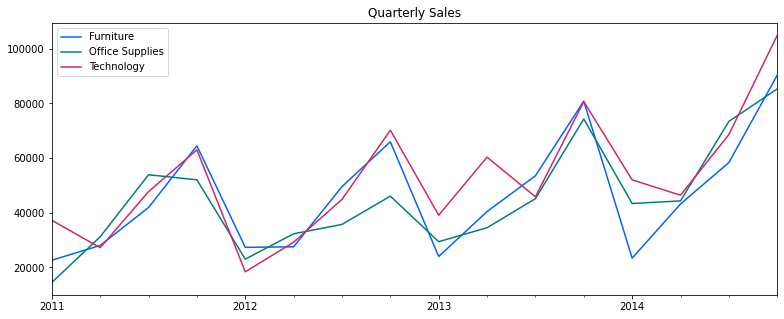

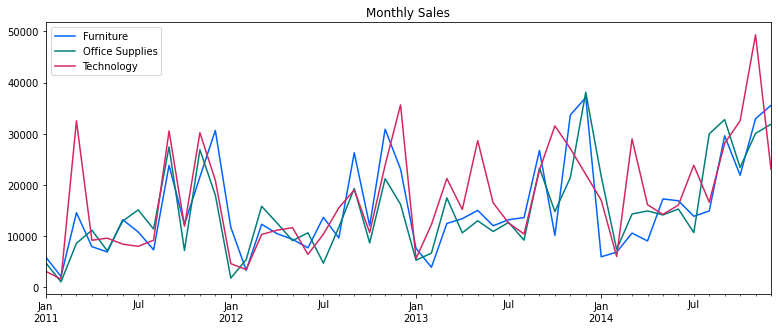

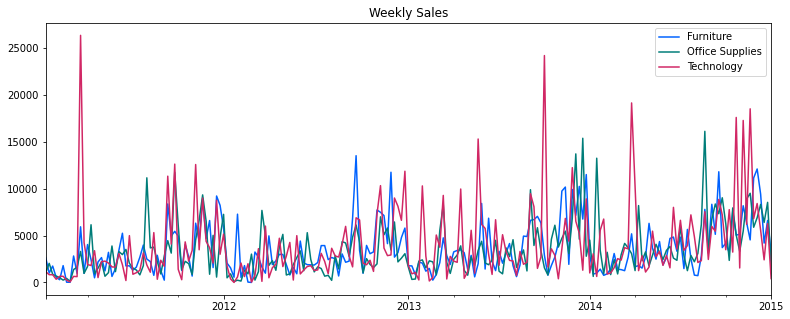

In [54]:
sales_quarterly.plot(figsize=plotsize, title='Quarterly Sales')
#plt.title('Monthly Sales')
sales_monthly.plot(figsize=plotsize, title='Monthly Sales')
#plt.title('Monthly Sales')
sales_weekly.plot(figsize=plotsize, title='Weekly Sales')
#plt.title('Monthly Sales')

Here, we plot functions like rolling averages and cumulative Sales calculated above:

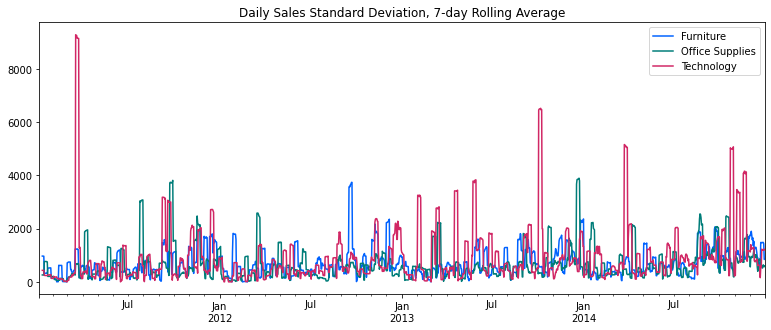

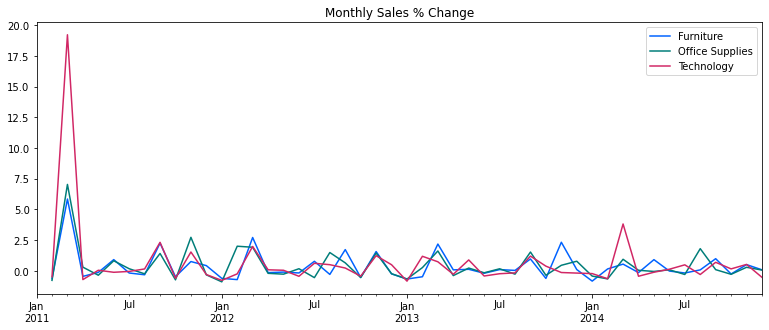

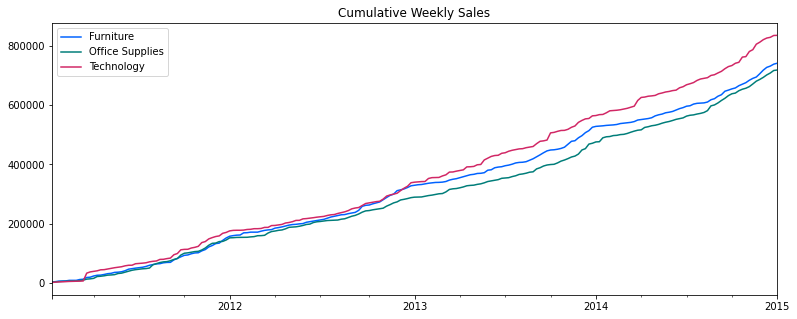

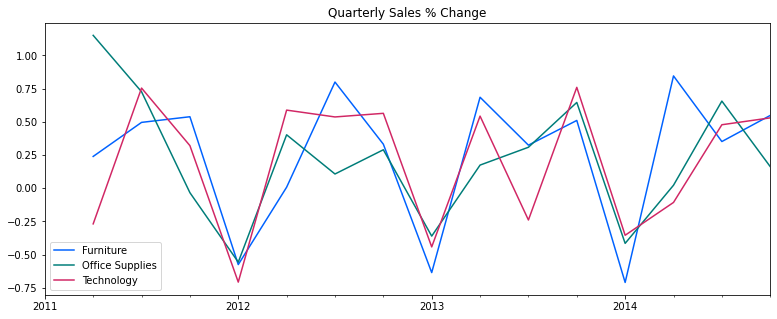

In [55]:
#rolling_window.mean().plot(figsize=plotsize, title='Daily Sales, 7-day Rolling Average')
rolling_window.std().plot(figsize=plotsize, title='Daily Sales Standard Deviation, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')


## Time Series Visualizations
There are a number of packages to help analyze Time Series data and create relevant plots. One example is __[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)__, which includes a number of methods for plotting Time Series-specific visualizations:
- __[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)__: Plot of the Autocorrelation Function
- __[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)__: Plot of the Partial Autocorrelation Function
- __[month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot)__: Seasonal Plot for Monthly Data
- __[quarter_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html#statsmodels.graphics.tsaplots.quarter_plot)__: Seasonal Plot for Quarterly Data

Some examples are illustrated below:


Daily data Autocorrelation Plots


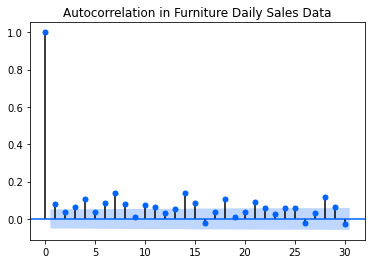

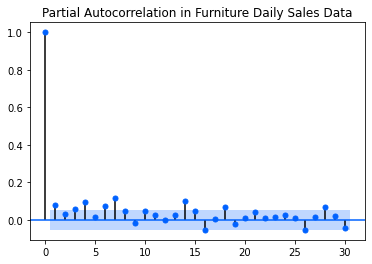

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Daily data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_new['Furniture'], lags=30, title='Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_new['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Weekly data Autocorrelation Plots


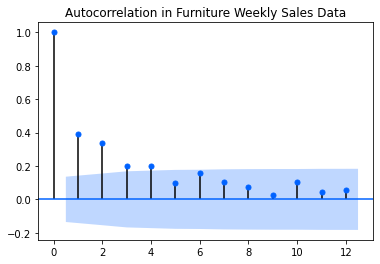

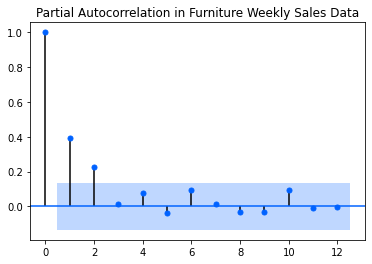

In [57]:
print('\nWeekly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Monthly Data Seasonal Plot


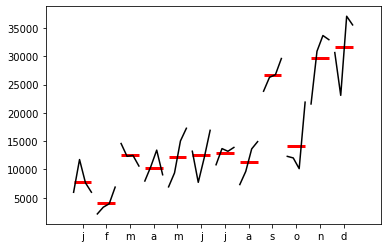

In [58]:
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sales_monthly['Furniture'])


Quarterly Data Seasonal Plot


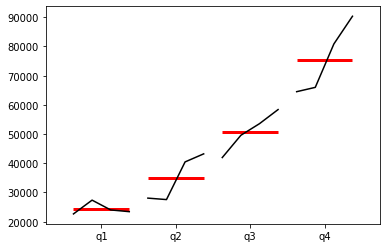

In [59]:
print('\nQuarterly Data Seasonal Plot')
q_plot = quarter_plot(sales_quarterly['Furniture'])

# Exercises
## Exercise 1:
Using the source data, set up Monthly data for Sales and Profit by Segment by either (1) Resampling or (2) Grouping data by Year and Month.

In [ ]:
### BEGIN SOLUTION
new_vars = ['Segment','Profit','Order Date','Sales']
new_base = df[new_vars].set_index('Order Date')
prof_pivot = new_base.pivot_table(columns='Segment',index = 'Order Date')
prof_month = prof_pivot.resample('M').sum()
prof_month.head()
### END SOLUTION

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31    106.5       5.9       185.0  1,304.1     568.0       855.9
2011-02-28    228.3     126.0        37.9  1,442.7     464.1       104.1
2011-03-31    -26.5     131.3        73.7  3,777.8   1,988.4     4,439.9
2011-04-30    336.9     435.6       527.9  3,752.8   3,951.2     2,031.6
2011-05-31    484.0     873.0       -63.3  5,373.2   4,077.7       696.1

## Exercise 2:
Analyze the results from the first exercise to determine whether Autocorrelation or Seasonal patterns differ by Segment or whether we are looking at Sales or Profits.

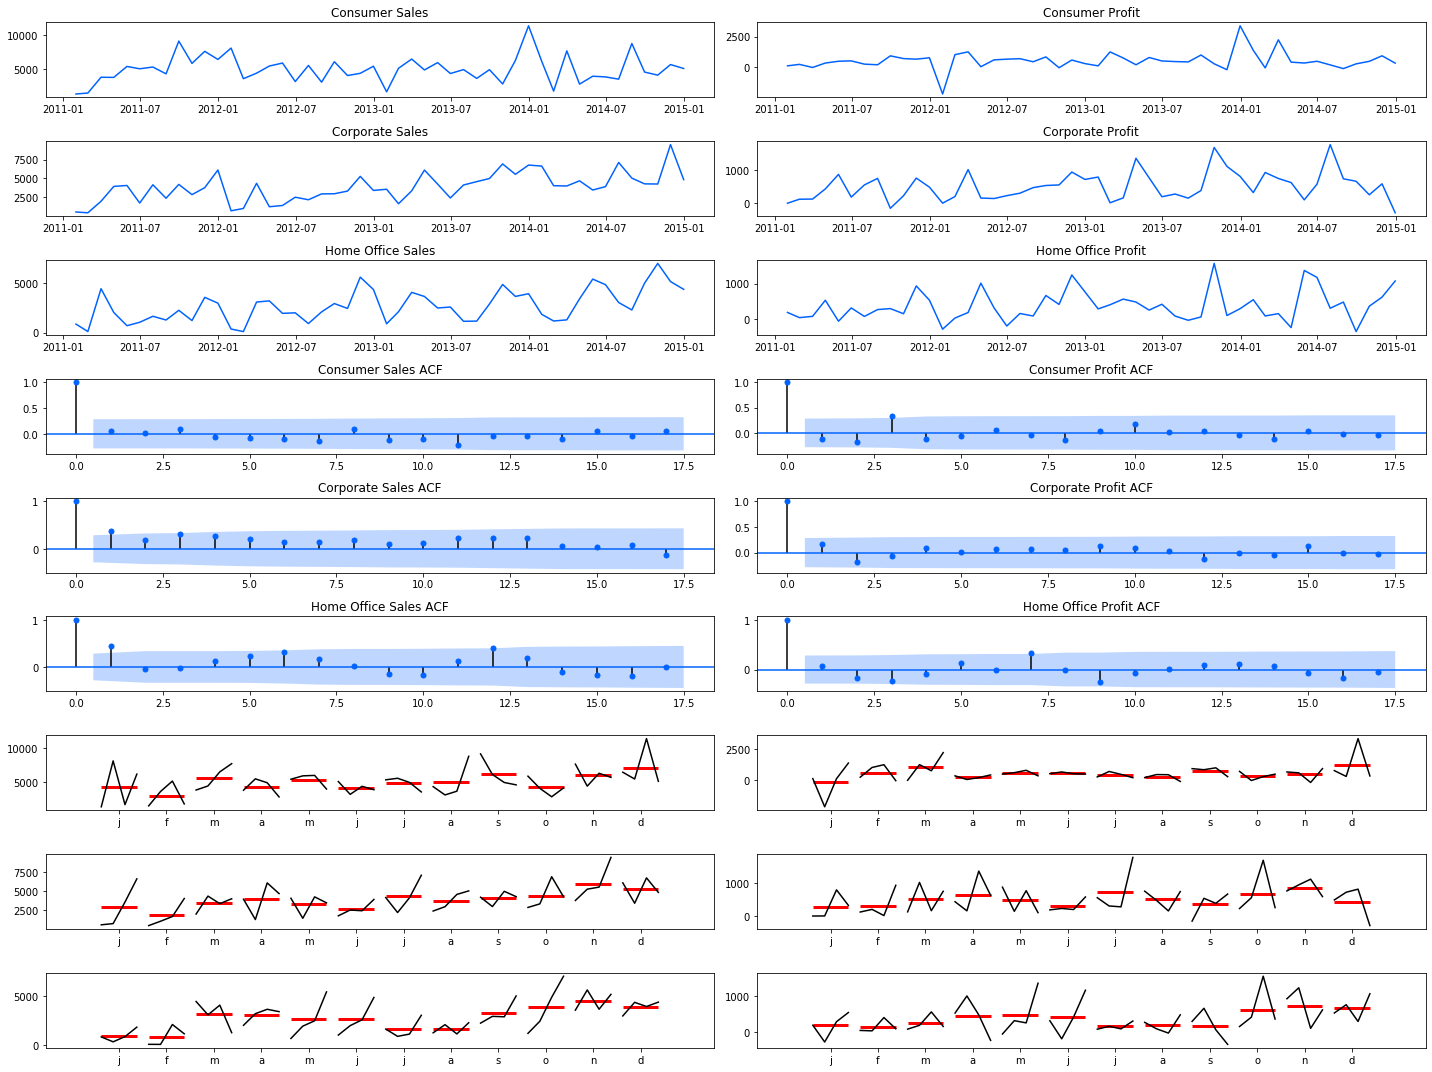

In [ ]:
### BEGIN SOLUTION
fig,axes = plt.subplots(9,2,figsize=(20,15),)
for i,cat in enumerate(['Consumer','Corporate','Home Office']):
    for j,money in enumerate(['Sales','Profit']):
        axes[i,j].plot(prof_month[money,cat])
        axes[i,j].title.set_text(cat+" "+money)
        plot_acf(prof_month[money,cat],ax=axes[i+3,j],title = cat+" "+money+" ACF")
        month_plot(prof_month[money,cat],ax=axes[i+6,j])

fig.tight_layout()
plt.show()
### END SOLUTION

Seasonal patterns across groups are pretty similar and there is very little autocorrelation.

## Exercise 3:
Use the result from Exercise 2 to develop an EDA function to explore other variables (like Region or Sub-Category) that may be of interest.

In [ ]:
### BEGIN SOLUTION
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_eda(cat_var=cat_var,
                date_var=date_var, 
                money_vars=money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(df[cat_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns=cat_var,index = date_var)
    prof_month = prof_pivot.resample('M').sum()
    prof_month.head()

    fig,axes = plt.subplots(num_cats*3, 2, figsize=(20, 5*num_cats),)
    for i,cat in enumerate(cats):
        for j,money in enumerate(money_vars):
            axes[i,j].plot(prof_month[money,cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_acf(prof_month[money,cat],ax=axes[i+num_cats,j],title = cat+" "+money+" ACF")
            fig = month_plot(prof_month[money,cat],ax=axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat+" Seasonality")

    fig.tight_layout()
    plt.show()
### END SOLUTION

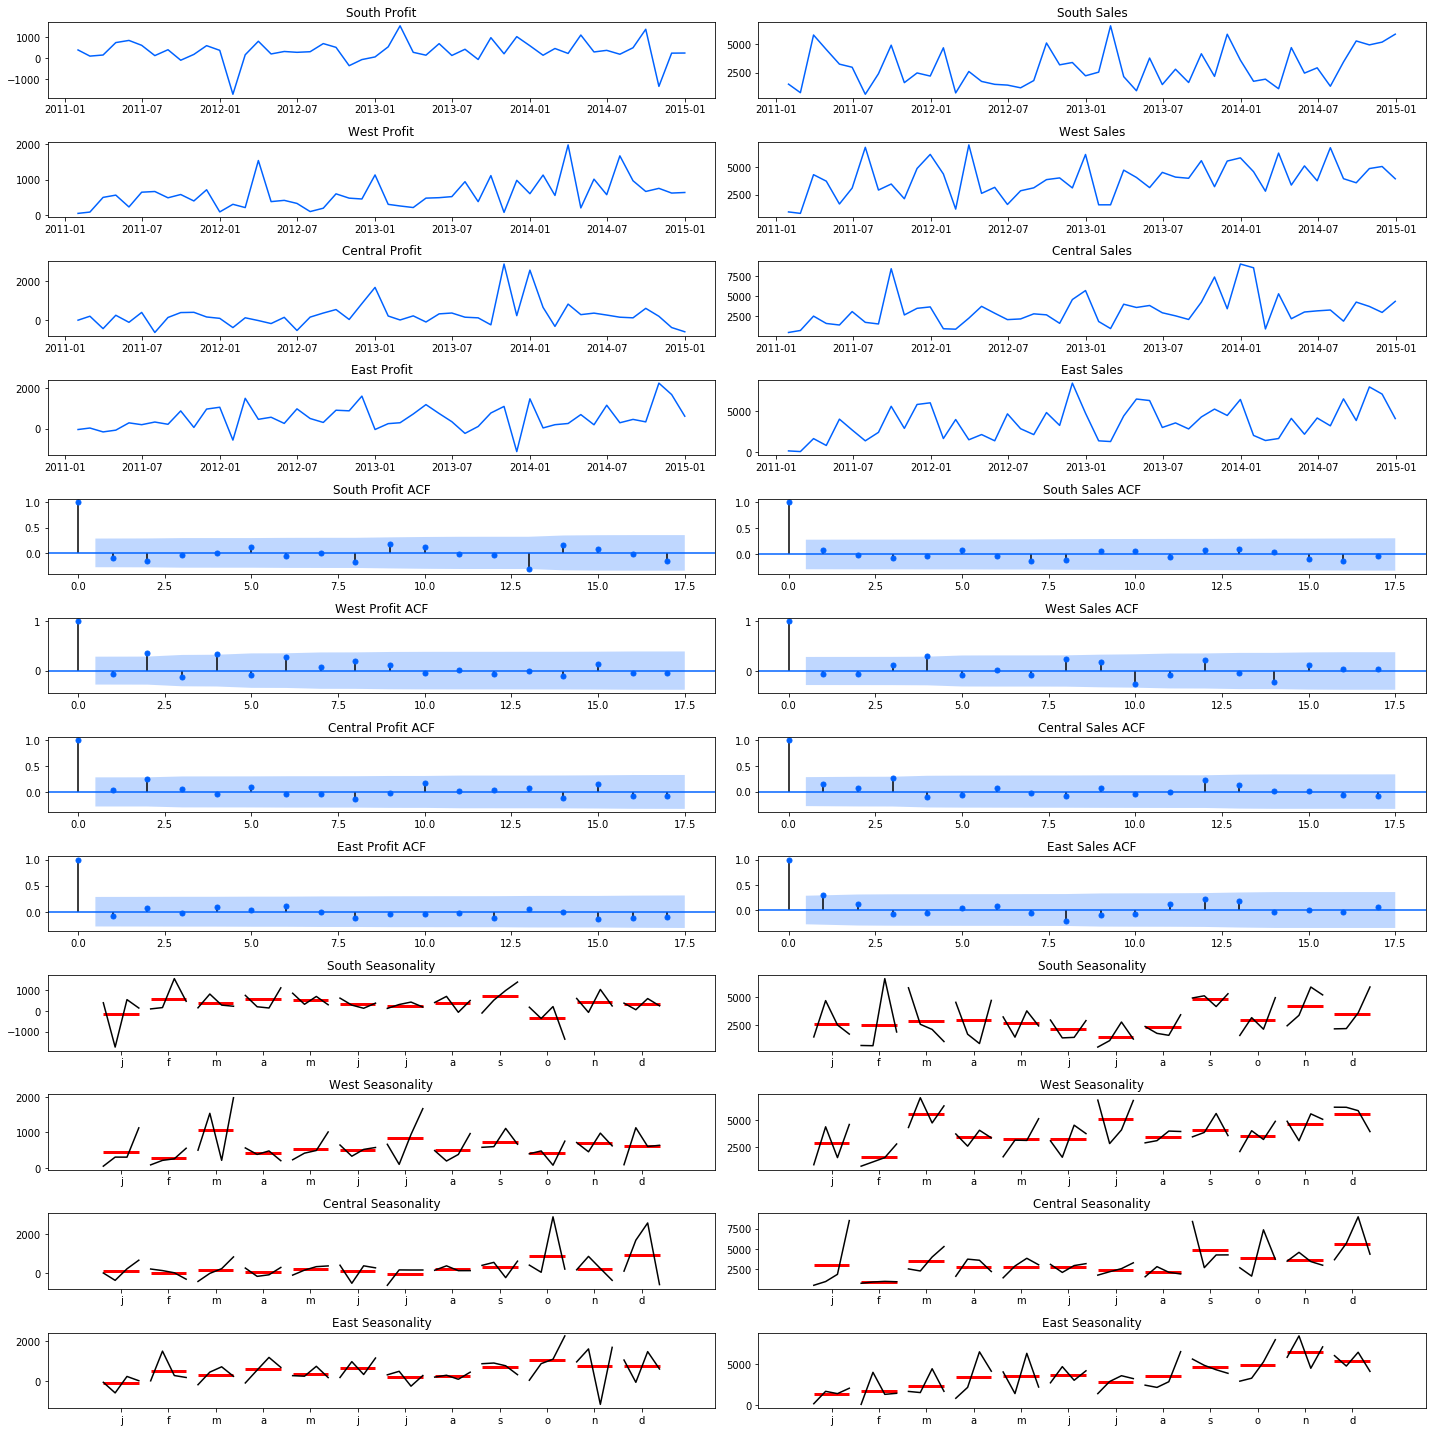

In [ ]:
monthly_eda(cat_var='Region')

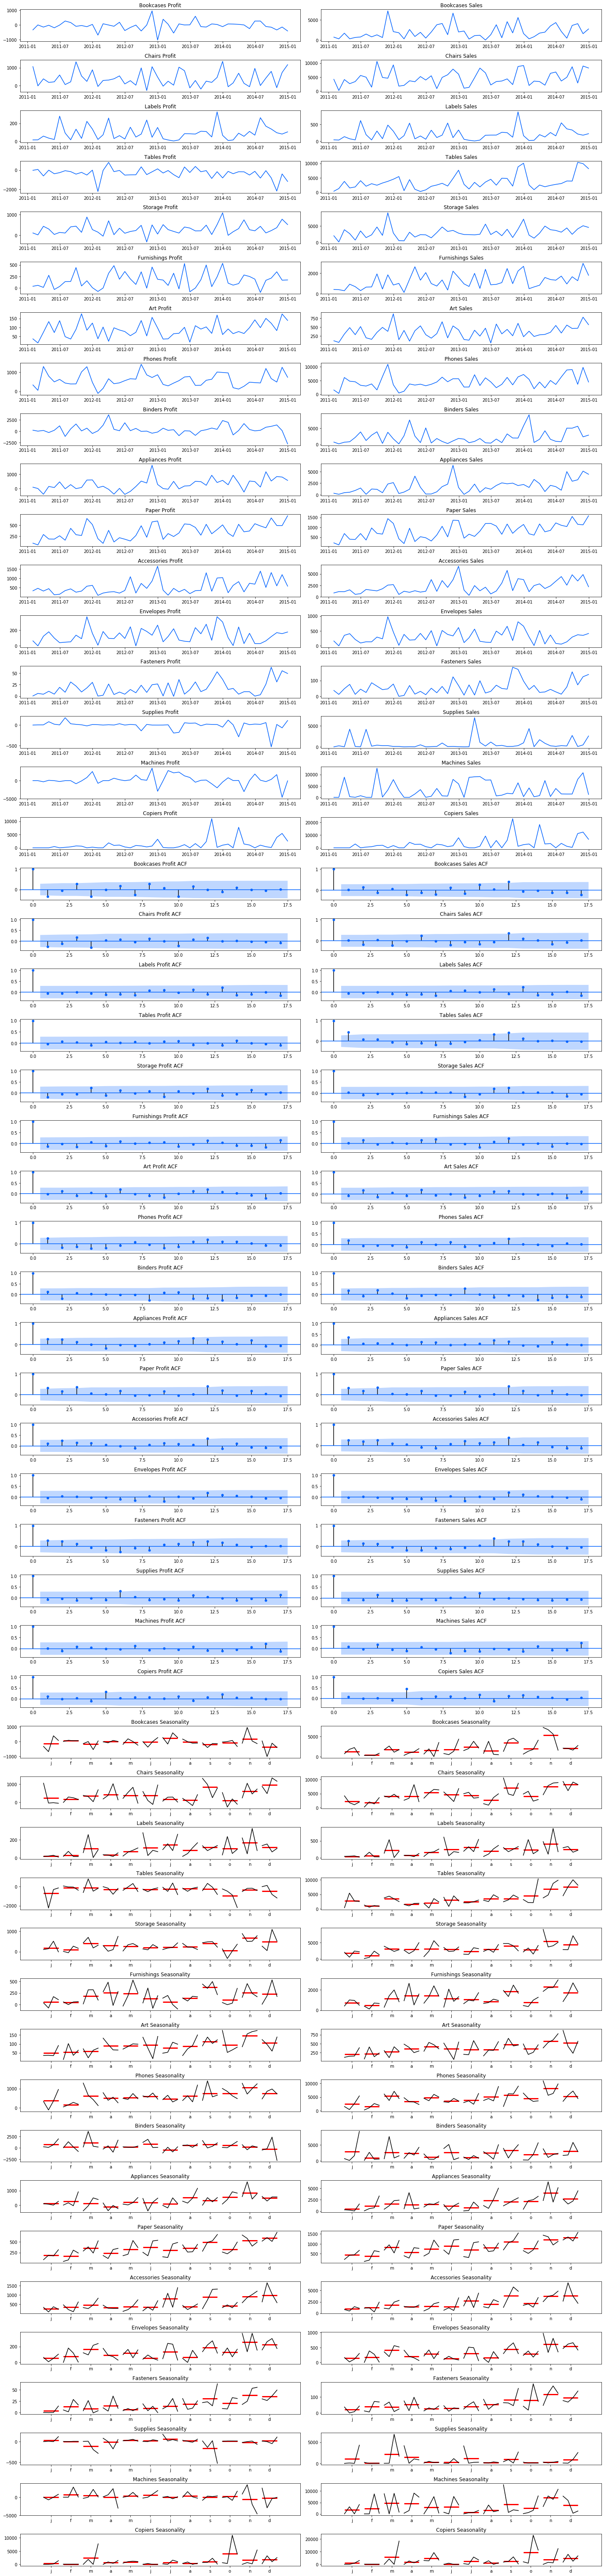

In [ ]:
monthly_eda(cat_var='Sub-Category')

---
### Machine Learning Foundation (C) 2020 IBM Corporation